# Tổng quan dữ liệu


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Features correlation

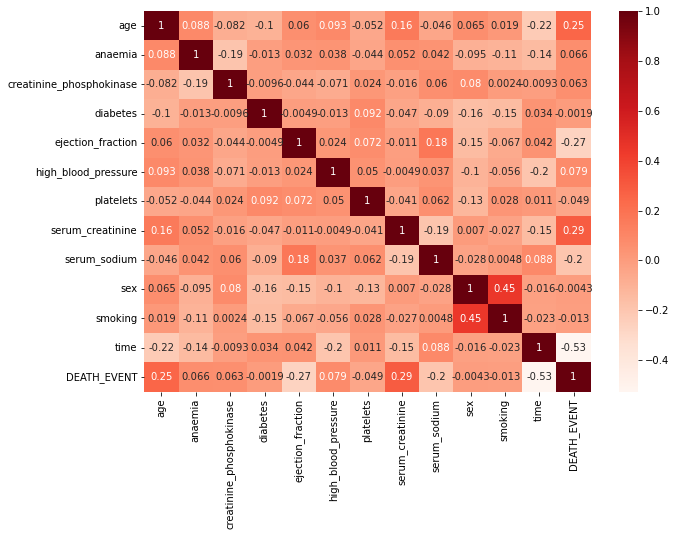

In [4]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Phân tách dữ liệu số và dữ liệu chữ

In [5]:
def Get_Features_types(data):
    categorical_features = []
    numerical_features = []
    for col in data.iloc[:,:-1]:
        if data[col].nunique() < 10:
            categorical_features.append(col)
        else : 
            numerical_features.append(col)
    return categorical_features , numerical_features

Get_Features_types(data)

categorical_features = Get_Features_types(data)[0]
numerical_features = Get_Features_types(data)[1]

print(categorical_features)
print(numerical_features)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


### Mô tả dữ liệu

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

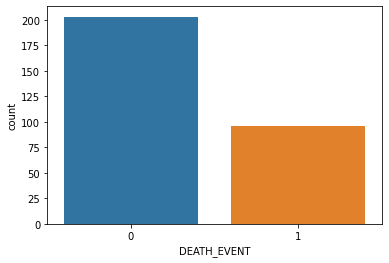

In [6]:
sns.countplot(x = 'DEATH_EVENT' , data = data)

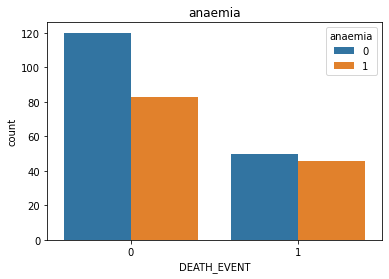

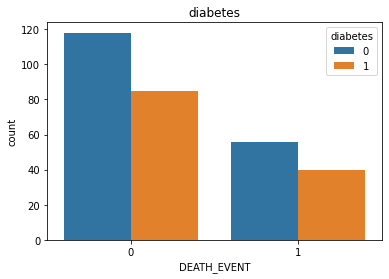

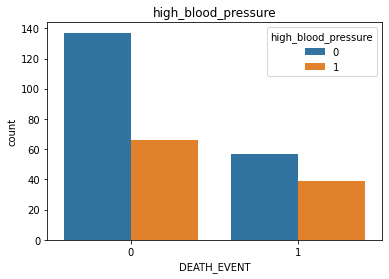

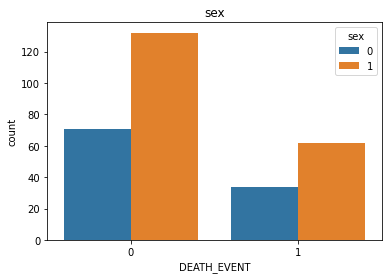

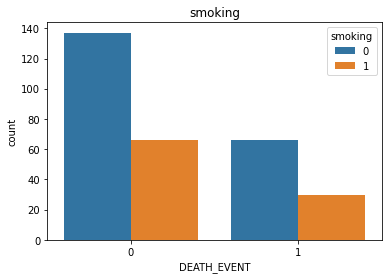

In [9]:
def CountPlot_hue_Categorical_data(data):
    for feature in categorical_features:
        plt.figure()
        sns.countplot(x = "DEATH_EVENT" , data = data , hue=feature)
        plt.title(feature)

CountPlot_hue_Categorical_data(data)

In [10]:
def Get_Percentage_data(data):
    percentage_death_true_case = []
    percentage_death_false_case = []
    for col in categorical_features:
        true_case = round(data['DEATH_EVENT'][data[col] == 1].value_counts(normalize = True)[1] * 100 , 2)
        false_case = round(data['DEATH_EVENT'][data[col] == 0].value_counts(normalize = True)[1] * 100, 2)
        percentage_death_true_case.append(true_case)
        percentage_death_false_case.append(false_case)
    Percentage = pd.DataFrame(list(zip(percentage_death_true_case, percentage_death_false_case)) ,
                              index = categorical_features,
                              columns = ['% Percentage Death (IF 1)' , '% Percentage Death (IF 0)'])
    return Percentage
        
Get_Percentage_data(data)

,% Percentage Death (IF 1),% Percentage Death (IF 0)
anaemia,35.66,29.41
diabetes,32.00,32.18
high_blood_pressure,37.14,29.38
sex,31.96,32.38
smoking,31.25,32.51


- Những người hút thuốc có tỷ lệ tử vong (31,25%), ngược lại những người hút thuốc không có tỷ lệ tử vong (32,51%) 
- Tỷ lệ phần trăm tử vong của nam giới gần tương đương với tỷ lệ tử vong của phụ nữ (Tương tự đối với người bệnh đái tháo đường).
- Trong bệnh Cao huyết áp và bệnh Amenia, chúng ta có thể thấy rõ ràng là có một chút khác biệt giữa tỷ lệ phần trăm tử vong.


# Sử dụng Mathemetic

In [6]:
X = data.drop(['anaemia', 'creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','sex','smoking','DEATH_EVENT'], axis=1, errors='ignore')
X = X.values
y = data['DEATH_EVENT']
y = y.values

In [7]:
new_data_point = np.array([51,47,1.55,12,])

### Tính khoảng cách

In [8]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [9]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([19, 13,  1], dtype=int64)

In [29]:
nearest_neighbor_death = y[nearest_neighbor_ids]
nearest_neighbor_death

19    1
13    1
1     1
Name: DEATH_EVENT, dtype: int64

# Sử dụng thư viện

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,AdaBoostClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest , f_classif

In [12]:
#Split the data
X = data.drop(['DEATH_EVENT'] , axis = 1)
y = data['DEATH_EVENT']
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 ,random_state=1)

In [13]:
print('x_train:',len(x_train))
print('y_train:',len(y_train))
print('x_test:',len(x_test))
print('y_test:',len(y_test))

x_train: 239
y_train: 239
x_test: 60
y_test: 60


In [14]:
#Feature scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Choosing K

In [15]:
error_rate = []
for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != knn.predict(x_test)))

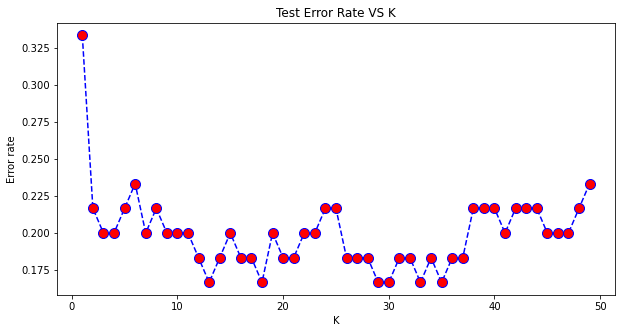

In [16]:
plt.figure(figsize=(10,5))
plt.title('Test Error Rate VS K')
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [17]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=14, p=2,metric='euclidean')

In [18]:
# Fit Model
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [19]:
# Predict the test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
print('%.2f %%'%(100*accuracy_score(y_test, y_pred)))

81.67 %


In [20]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[45  1]
 [10  4]]
0.4210526315789473
